In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import json

In [10]:
experiment_name = "finetuning_intelli_light_reward"

In [11]:
df = pd.read_csv(f"../evaluations/{experiment_name}.csv")

In [22]:
hd_columns = [column for column in df.columns if column.startswith("avg_hd")]
reward_columns = [column for column in df.columns if column.startswith("avg_reward")]
config_keys = list( json.loads(df.config.to_list()[0]).keys())

df["total_avg_reward"] = df[reward_columns].mean(axis=1)
df["total_avg_hd_distance"] = df[hd_columns].mean(axis=1)

for key in config_keys:
    df[key] = df["config"].apply(lambda x: json.loads(x)[key])

In [4]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_hd_distance", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
7,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-2927.147250,0.743110
2,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",-2722.213125,0.657371
6,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-2115.919250,0.621501
0,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",-2311.022250,0.599274
19,"{""delay"": 1, ""waiting_time"": 0, ""light_switche...",-822.087250,0.535303
8,"{""delay"": 0, ""waiting_time"": 2, ""light_switche...",-2121.491375,0.520721
16,"{""delay"": 1, ""waiting_time"": 0, ""light_switche...",-862.595500,0.504433
4,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-1729.067875,0.497896
26,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",-608.174750,0.487530
55,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",-608.174750,0.487530


In [16]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
103,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-299.430000,0.232545
100,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-303.089125,0.253070
99,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-304.878375,0.256984
93,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-307.044125,0.449844
104,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-309.101500,0.322840
97,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-316.901250,0.392439
94,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-321.809875,0.431641
105,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",-323.865750,0.388200
95,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-329.502500,0.424796
101,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-330.417000,0.390840


In [18]:
df_top_20 = df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)
df_top_20.to_csv(f"./top_20_{experiment_name}.csv", index=False)
df_top_20

,config,total_avg_reward,total_avg_hd_distance
103,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-299.430000,0.232545
100,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-303.089125,0.253070
99,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-304.878375,0.256984
93,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-307.044125,0.449844
104,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-309.101500,0.322840
97,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",-316.901250,0.392439
94,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-321.809875,0.431641
105,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",-323.865750,0.388200
95,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",-329.502500,0.424796
101,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",-330.417000,0.390840


In [7]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).config.to_list()[:20]

['{"delay": 2, "waiting_time": 10, "light_switches": 2}',
 '{"delay": 1, "waiting_time": 10, "light_switches": 3}',
 '{"delay": 1, "waiting_time": 10, "light_switches": 2}',
 '{"delay": 0, "waiting_time": 10, "light_switches": 0}',
 '{"delay": 2, "waiting_time": 10, "light_switches": 3}',
 '{"delay": 1, "waiting_time": 10, "light_switches": 0}',
 '{"delay": 0, "waiting_time": 10, "light_switches": 1}',
 '{"delay": 3, "waiting_time": 10, "light_switches": 0}',
 '{"delay": 0, "waiting_time": 10, "light_switches": 2}',
 '{"delay": 2, "waiting_time": 10, "light_switches": 0}',
 '{"delay": 0, "waiting_time": 10, "light_switches": 3}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 2}',
 '{"delay": 3, "waiting_time": 10, "light_switches": 2}',
 '{"delay": 1, "waiting_time": 10, "light_switches": 1}',
 '{"delay": 2, "waiting_time": 10, "light_switches": 1}',
 '{"delay": 3, "waiting_time": 10, "light_switches": 3}',
 '{"delay": 3, "waiting_time": 0, "light_switches": 0}',
 '{"delay": 3, "

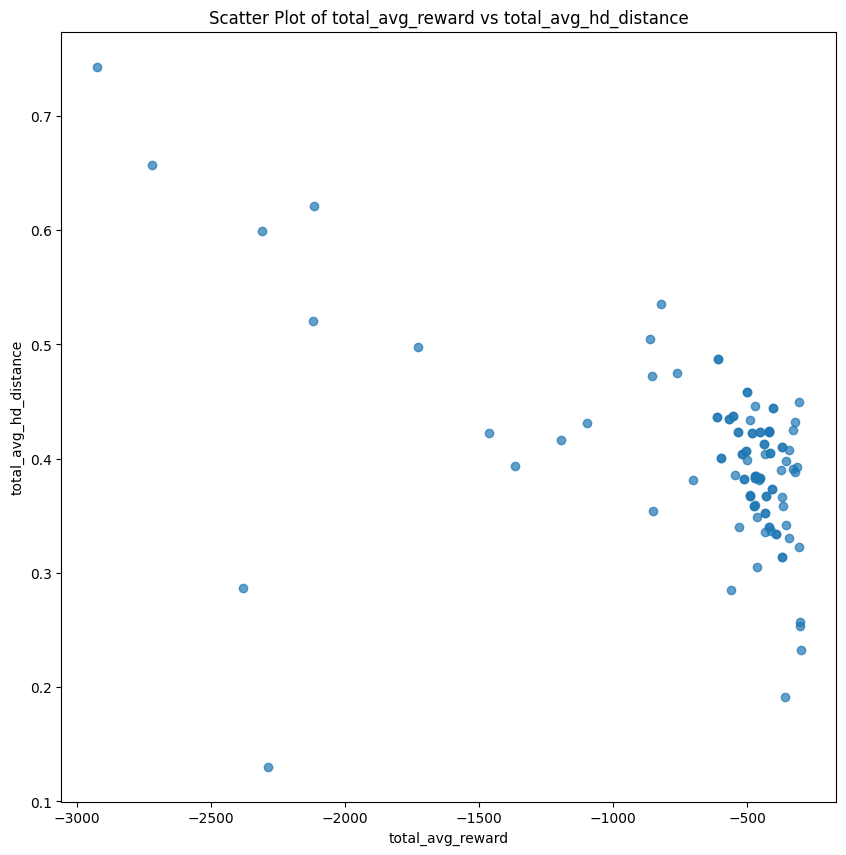

In [6]:
col1 = "total_avg_reward"
col2 = "total_avg_hd_distance"
plt.figure(figsize=(10, 10))
plt.scatter(df[col1], df[col2], alpha=0.7)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.show()

In [4]:
print("Correlation total_avg_hd_distance and total_avg_reward", df["total_avg_hd_distance"].corr(df['total_avg_reward']))

Correlation total_avg_hd_distance and total_avg_reward -0.4717016193757511


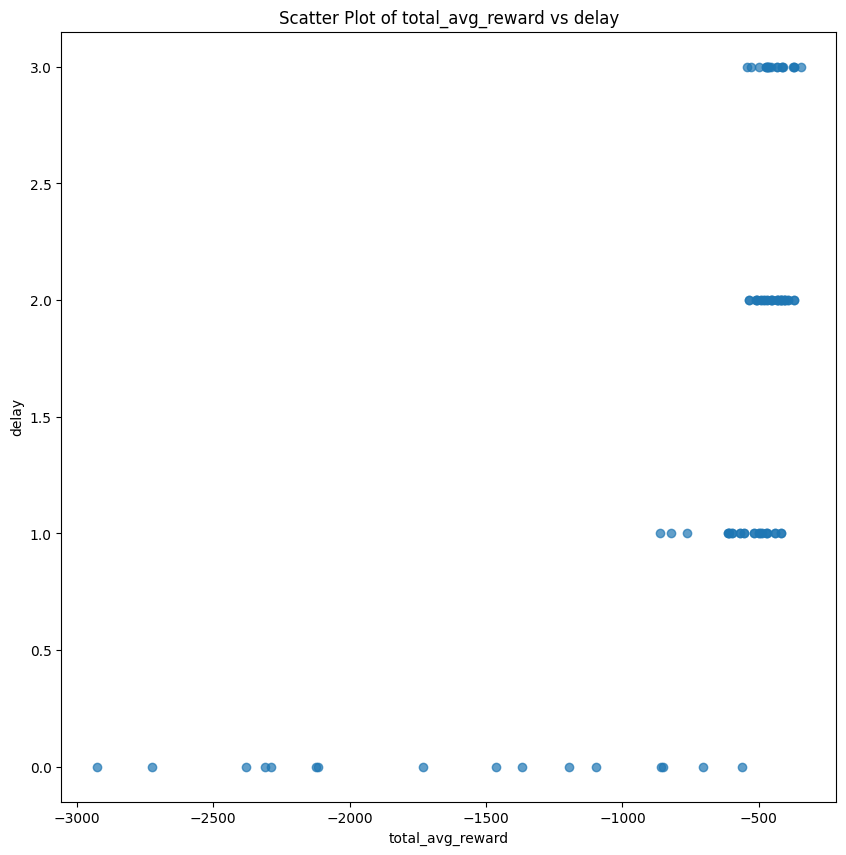

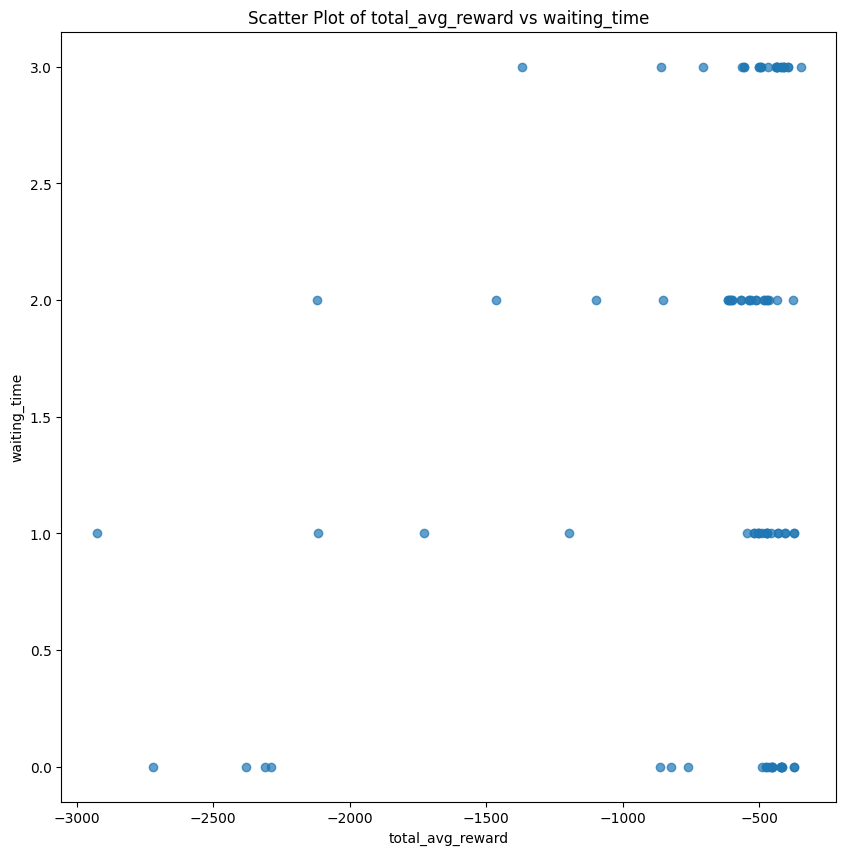

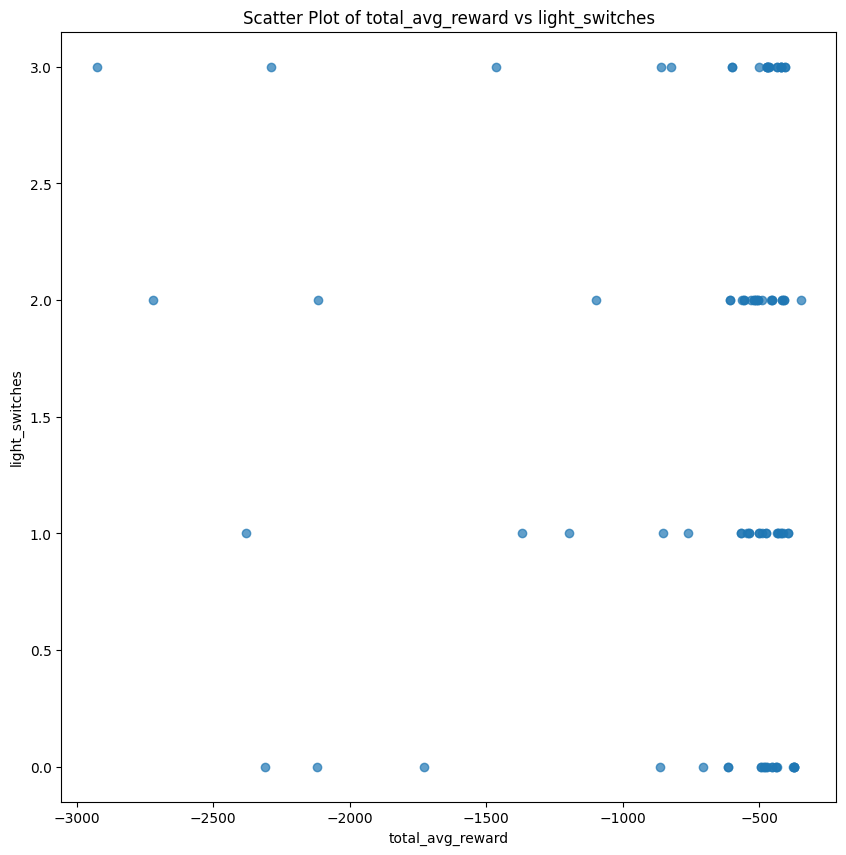

In [11]:
for col in config_keys:
    col1 = "total_avg_reward"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [19]:
for key in config_keys:
    print(df.groupby(key)['total_avg_reward'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and total_avg_reward", df[key].corr(df['total_avg_reward']))

   delay         mean         std
0      0 -1400.041925  868.746535
1      1  -525.744475  134.173926
2      2  -435.090260   59.408411
3      3  -427.876511   60.375737
Correlation delay and total_avg_reward 0.5554363634004528
   waiting_time        mean         std
0             0 -830.947957  763.506249
1             1 -741.547477  664.765754
2             2 -671.558469  386.807626
3             3 -518.033146  211.713295
4            10 -331.345977   24.665201
Correlation waiting_time and total_avg_reward 0.2947595443514829
   light_switches        mean         std
0               0 -637.393454  531.323894
1               1 -610.570083  429.621342
2               2 -627.031710  533.352002
3               3 -667.617722  610.441211
Correlation light_switches and total_avg_reward -0.022808663851698007


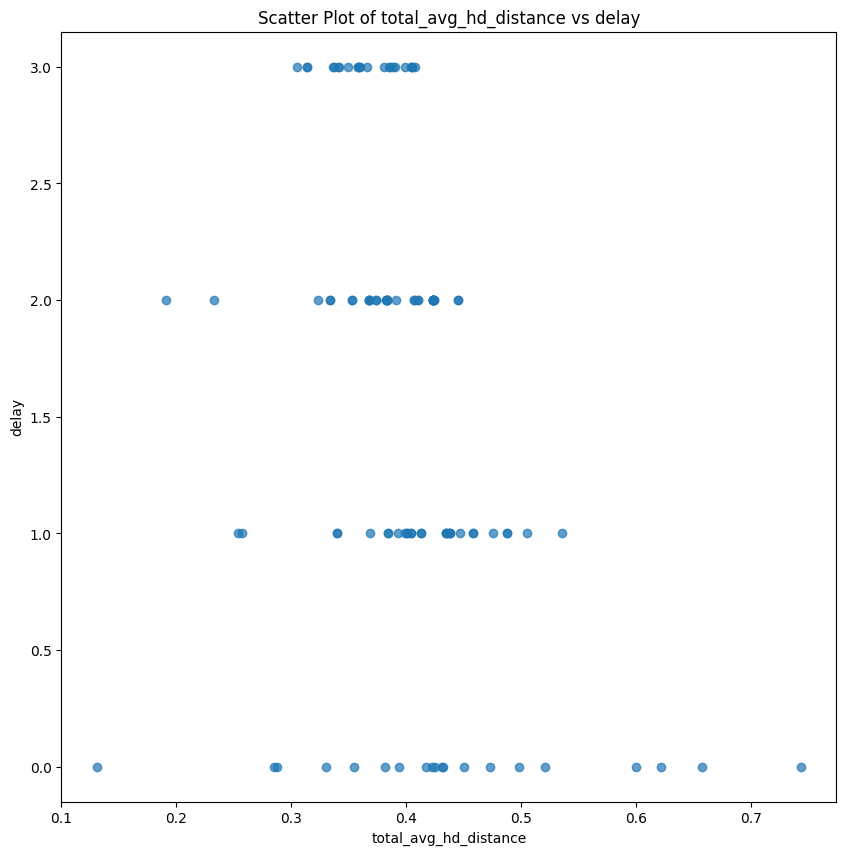

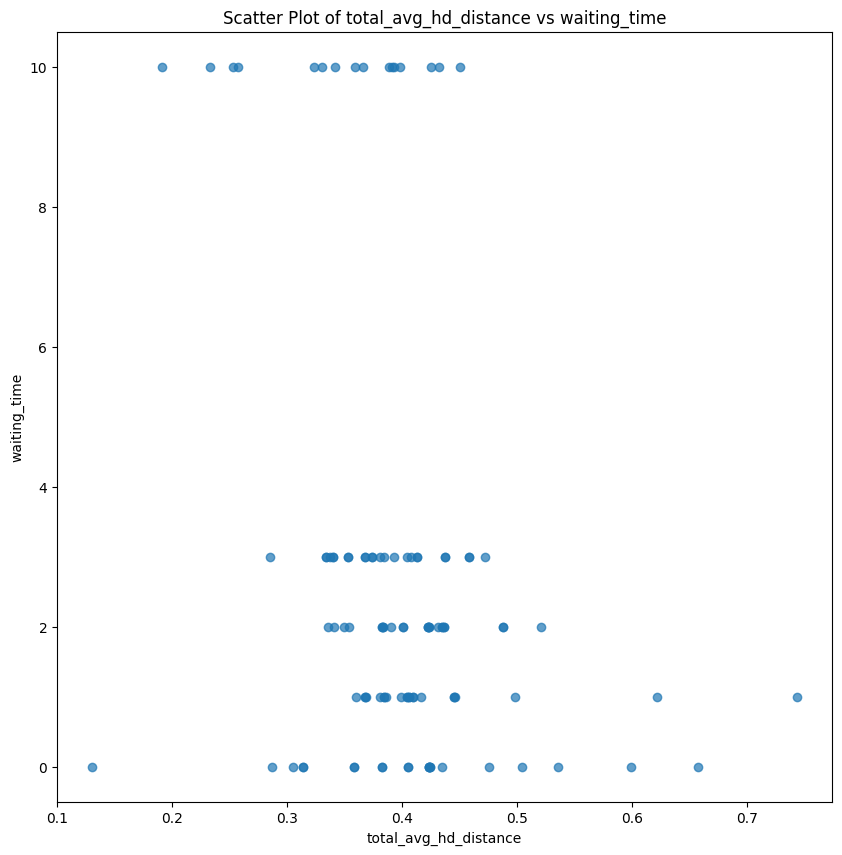

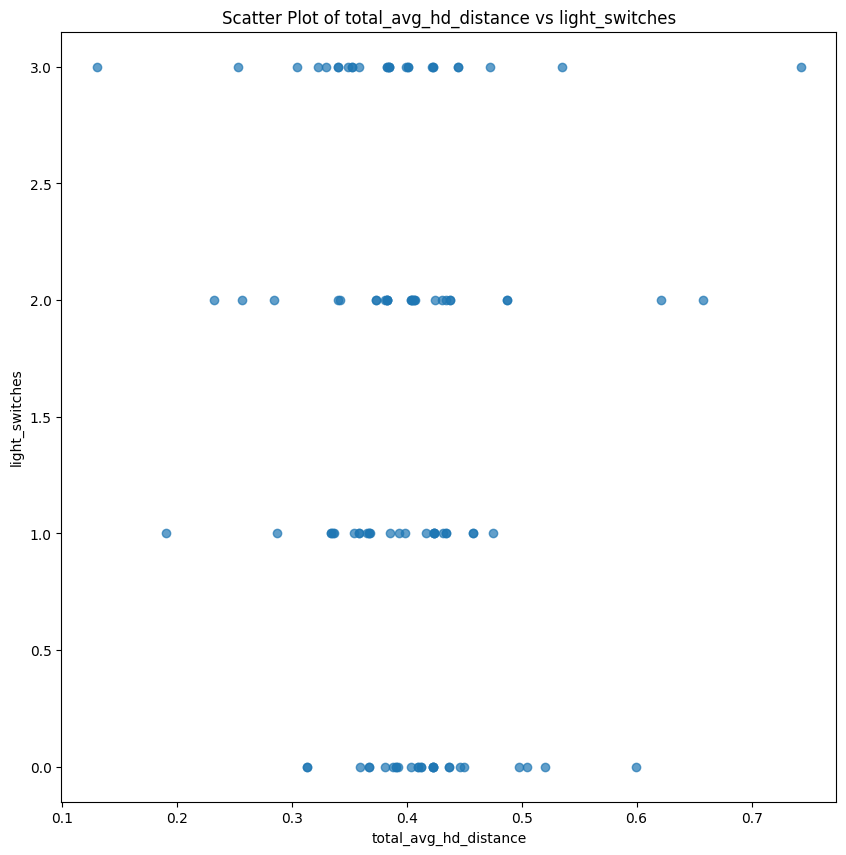

In [20]:
for col in config_keys:
    col1 = "total_avg_hd_distance"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [21]:
for key in config_keys:
    print(df.groupby(key)['total_avg_hd_distance'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and hd_distance", df[key].corr(df['total_avg_hd_distance']))

   delay      mean       std
0      0  0.442448  0.141042
1      1  0.415214  0.062238
2      2  0.382733  0.052719
3      3  0.364587  0.031632
Correlation delay and hd_distance -0.34251169807105414
   waiting_time      mean       std
0             0  0.408145  0.108156
1             1  0.429637  0.089852
2             2  0.411931  0.046066
3             3  0.383936  0.046992
4            10  0.345567  0.076501
Correlation waiting_time and hd_distance -0.3004462598542814
   light_switches      mean       std
0               0  0.418354  0.060458
1               1  0.382935  0.060075
2               2  0.406118  0.087562
3               3  0.387523  0.102667
Correlation light_switches and hd_distance -0.09634396214129677


/tmp/ipykernel_12865/2009220976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
/tmp/ipykernel_12865/2009220976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)


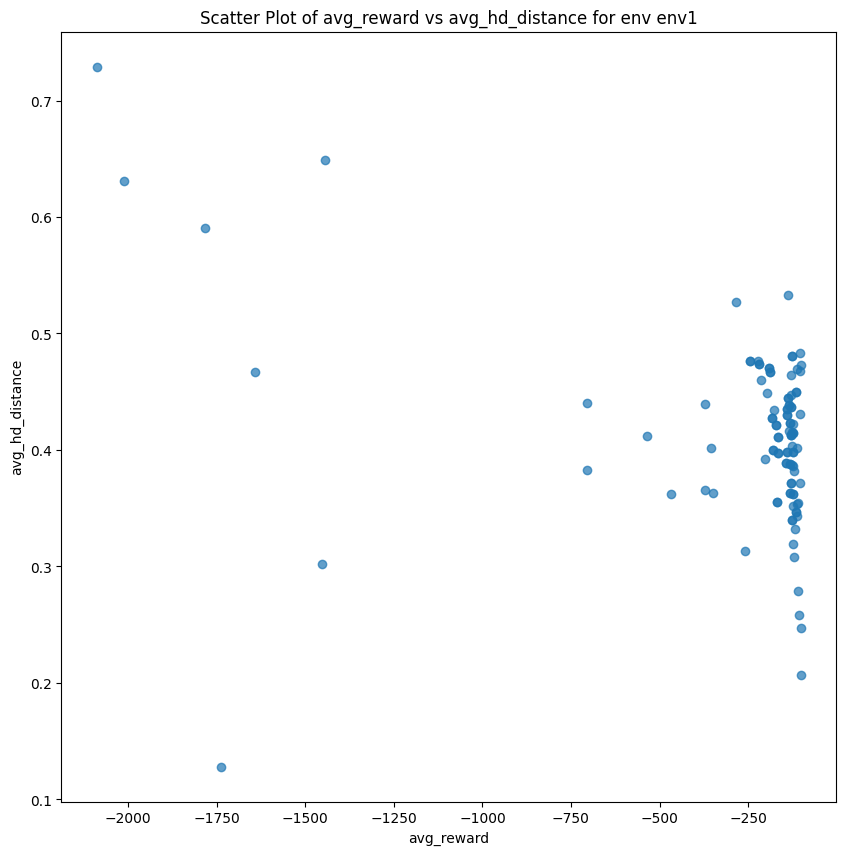

/tmp/ipykernel_12865/2009220976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
/tmp/ipykernel_12865/2009220976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)


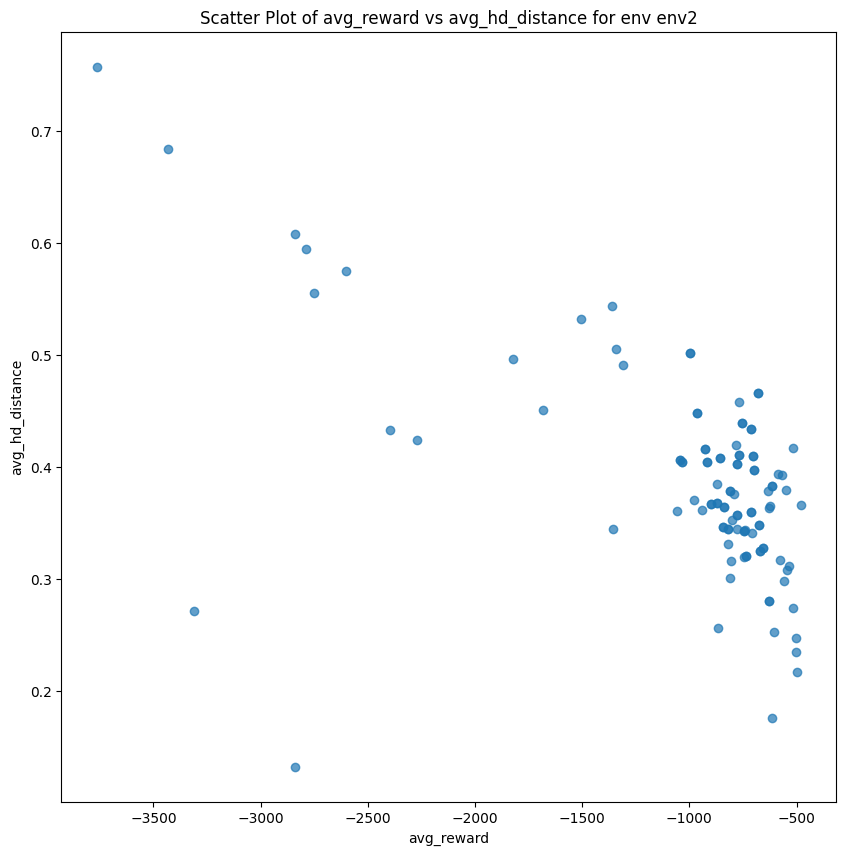

In [17]:
for env in ["env1", "env2"]:
    df_env = df[[f"avg_hd_distance_{env}_agent1",
                f"avg_reward_{env}_agent1",
                f"avg_hd_distance_{env}_agent2",
                f"avg_reward_{env}_agent2"]]
    col1 = "avg_reward"
    col2 = "avg_hd_distance"
    df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
    df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)
    plt.figure(figsize=(10, 10))
    plt.scatter(df_env[col1], df_env[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2} for env {env}')
    plt.show()

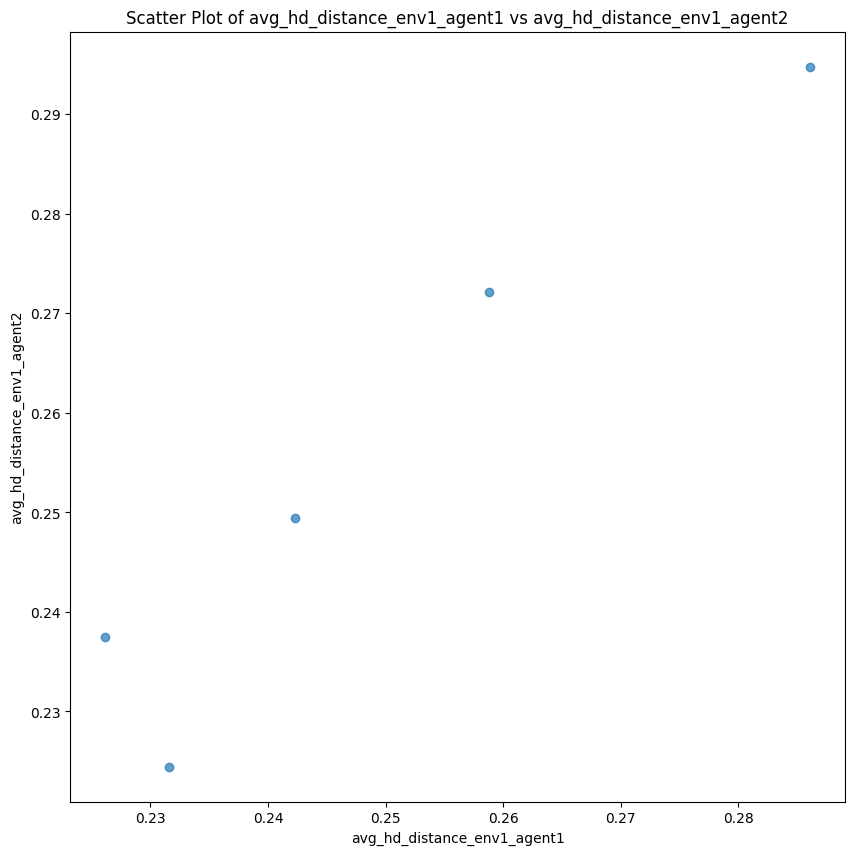

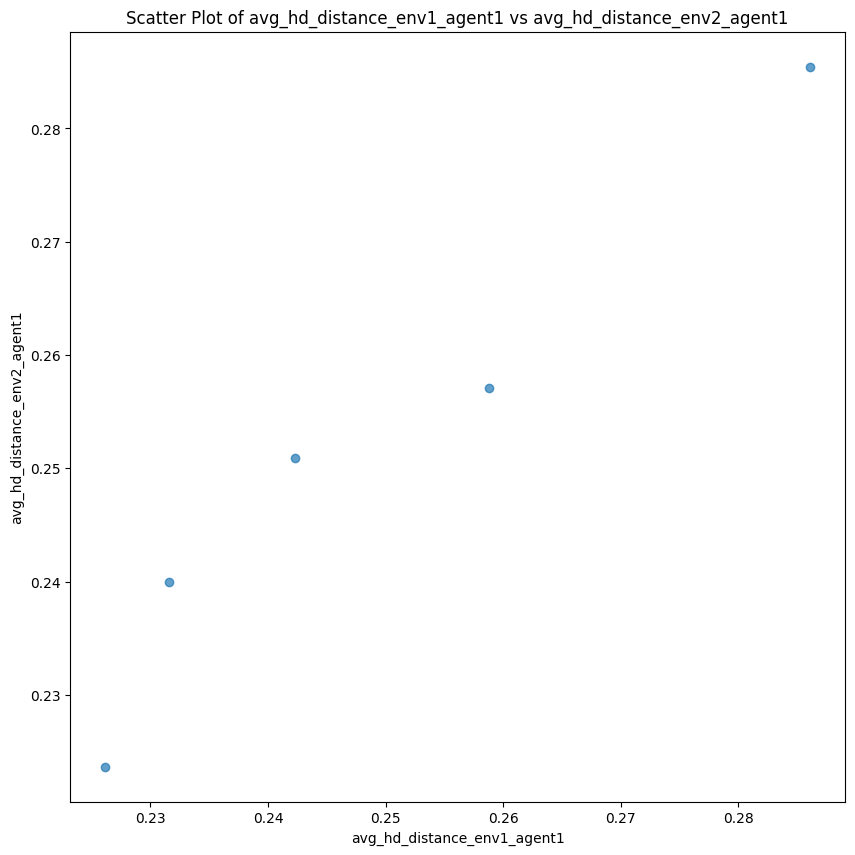

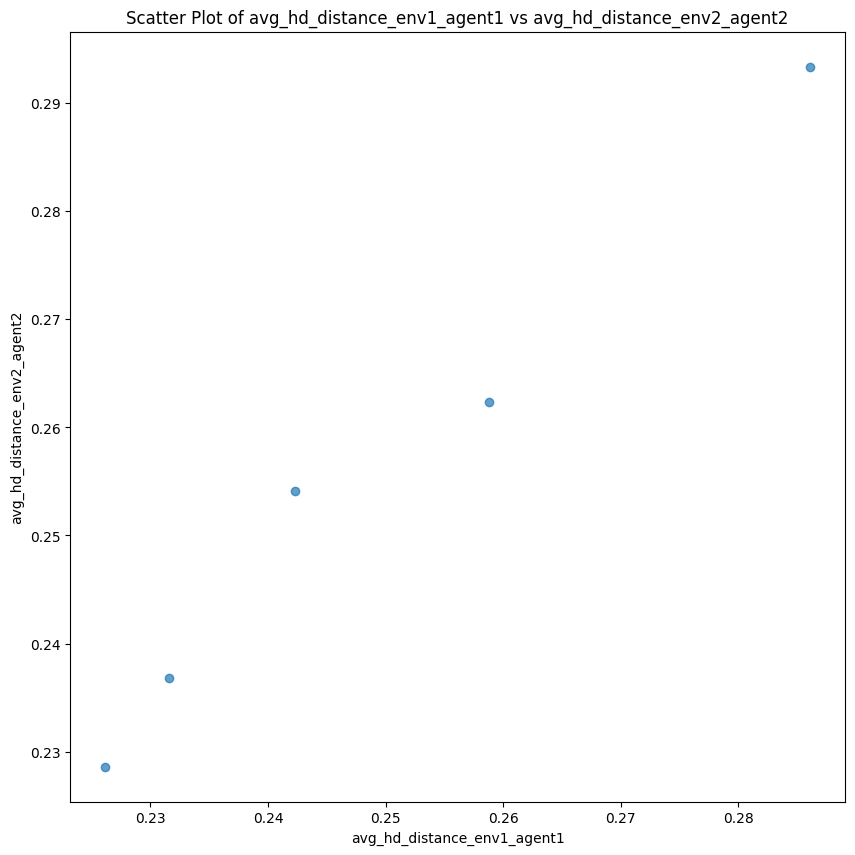

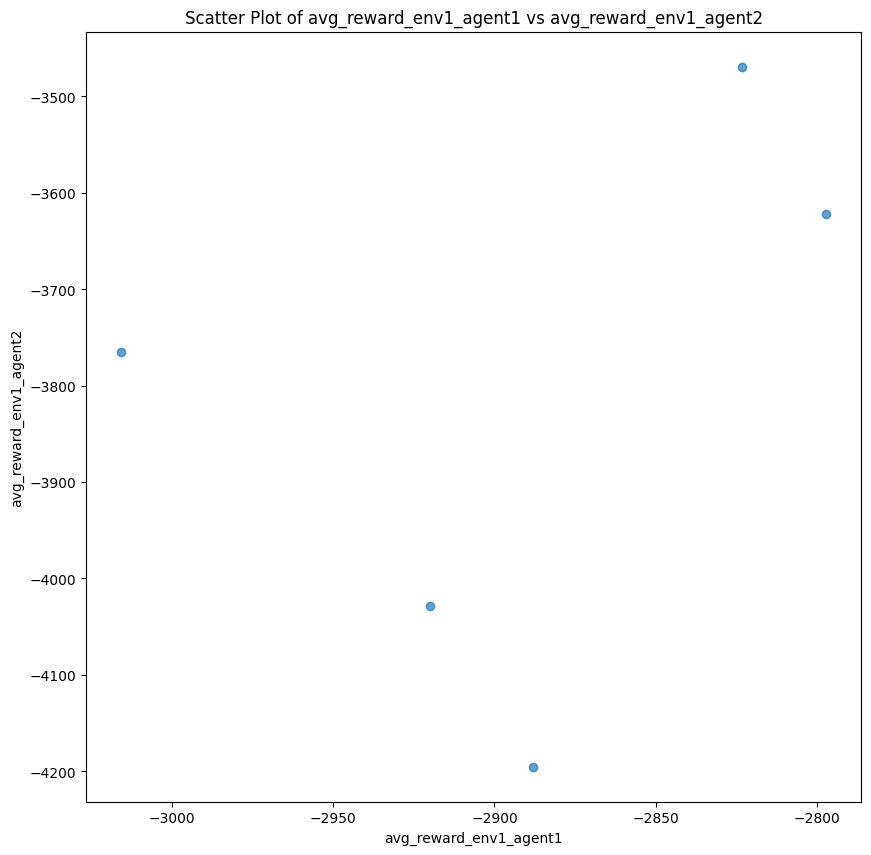

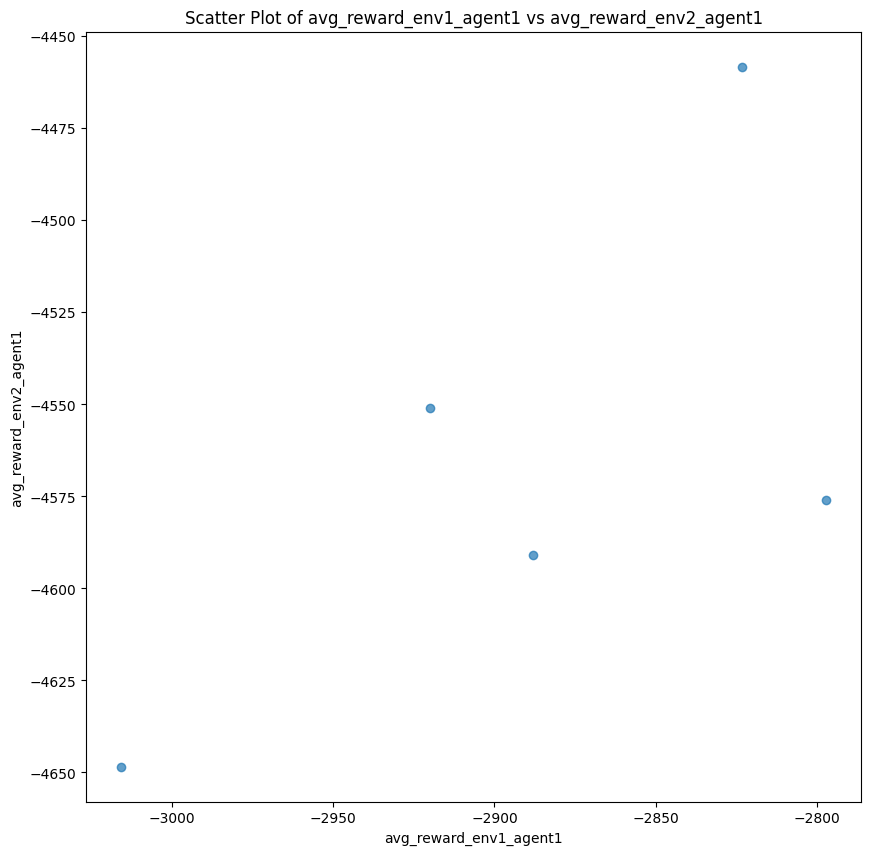

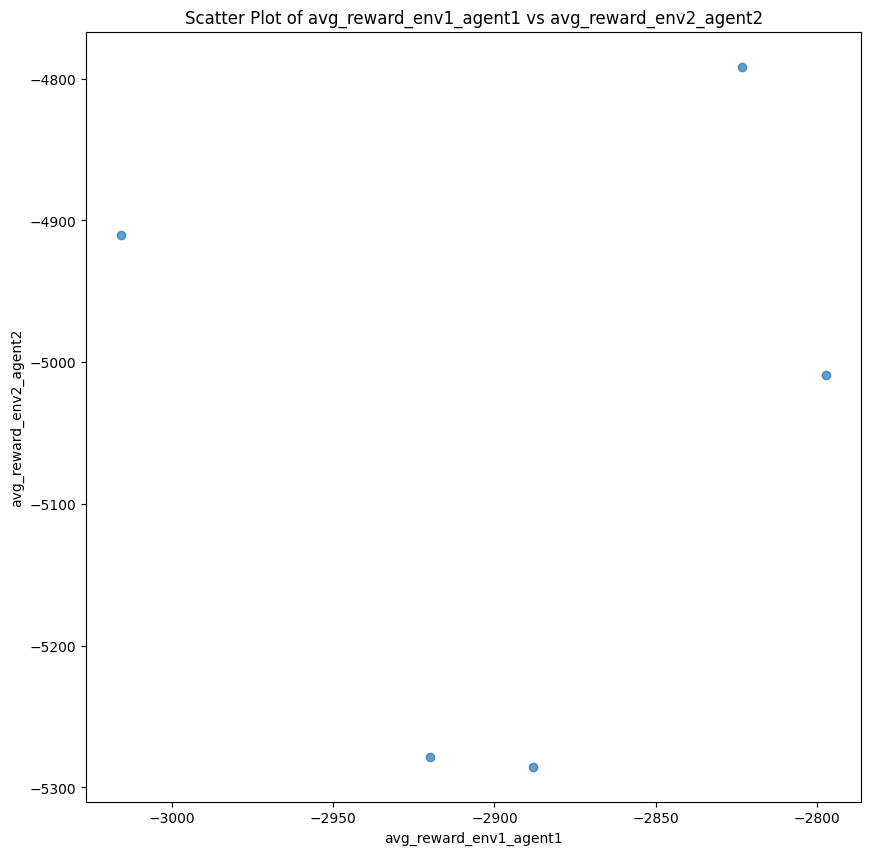

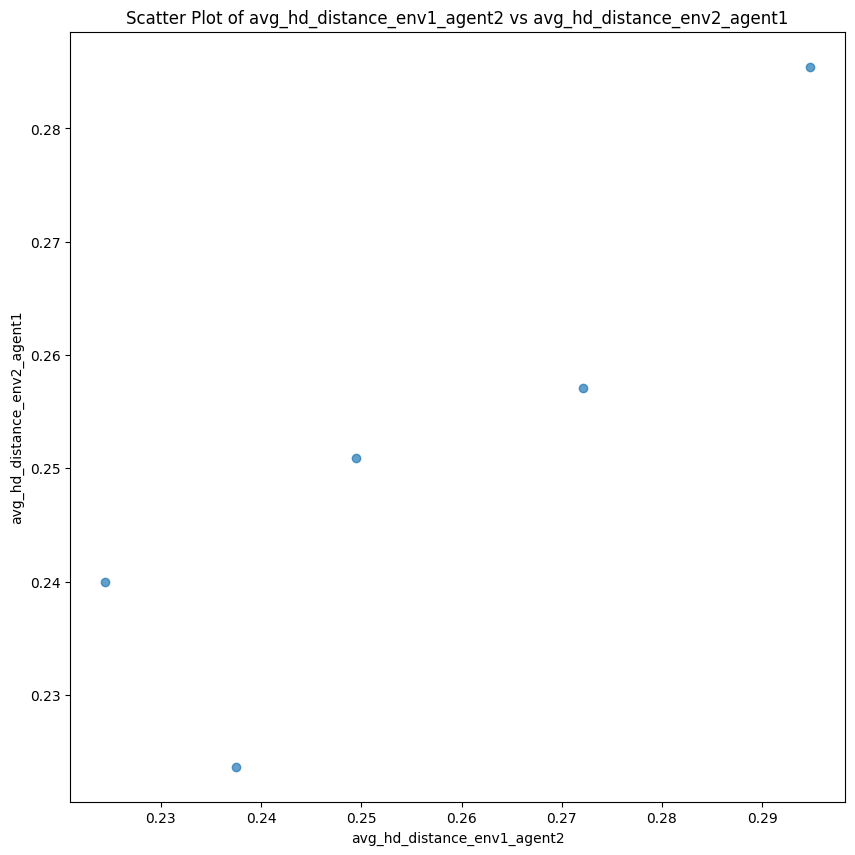

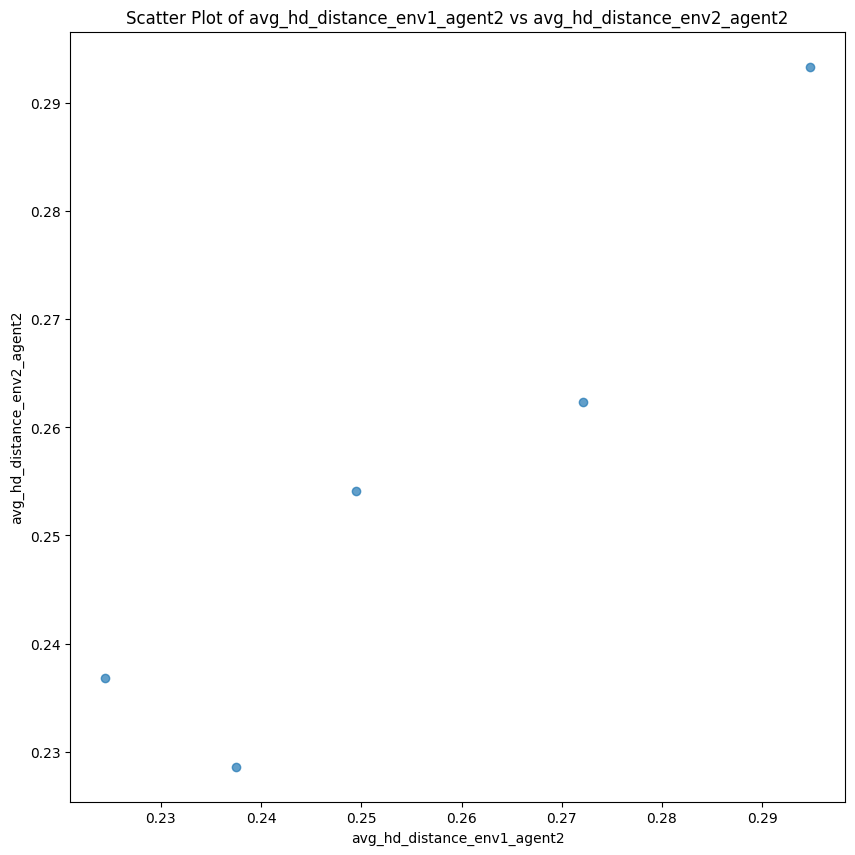

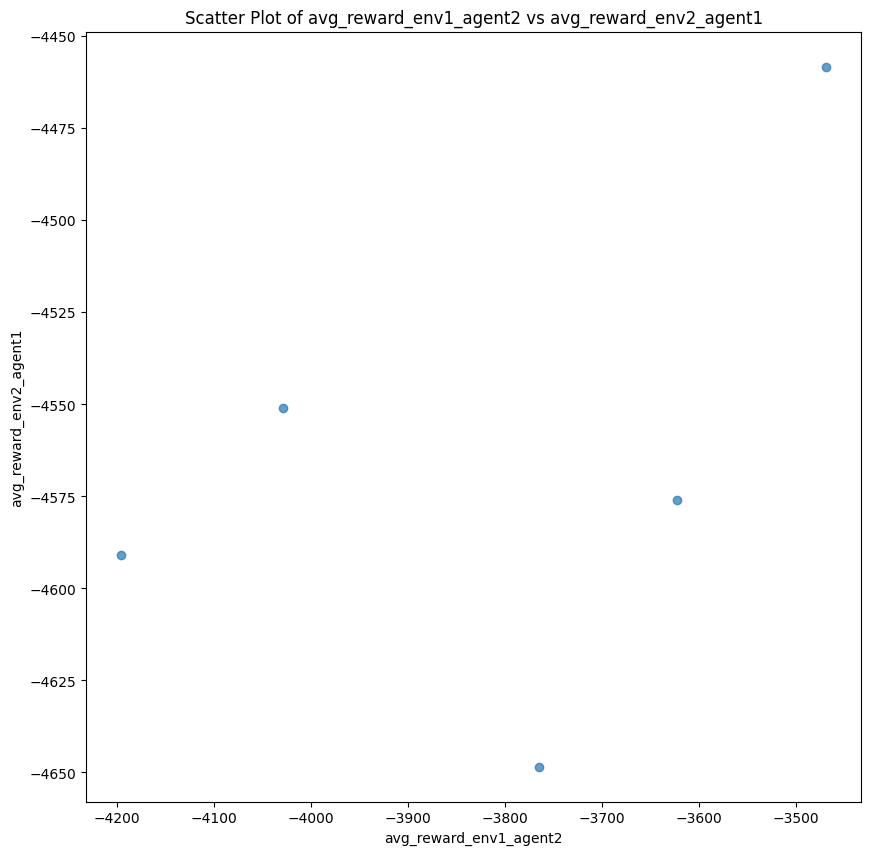

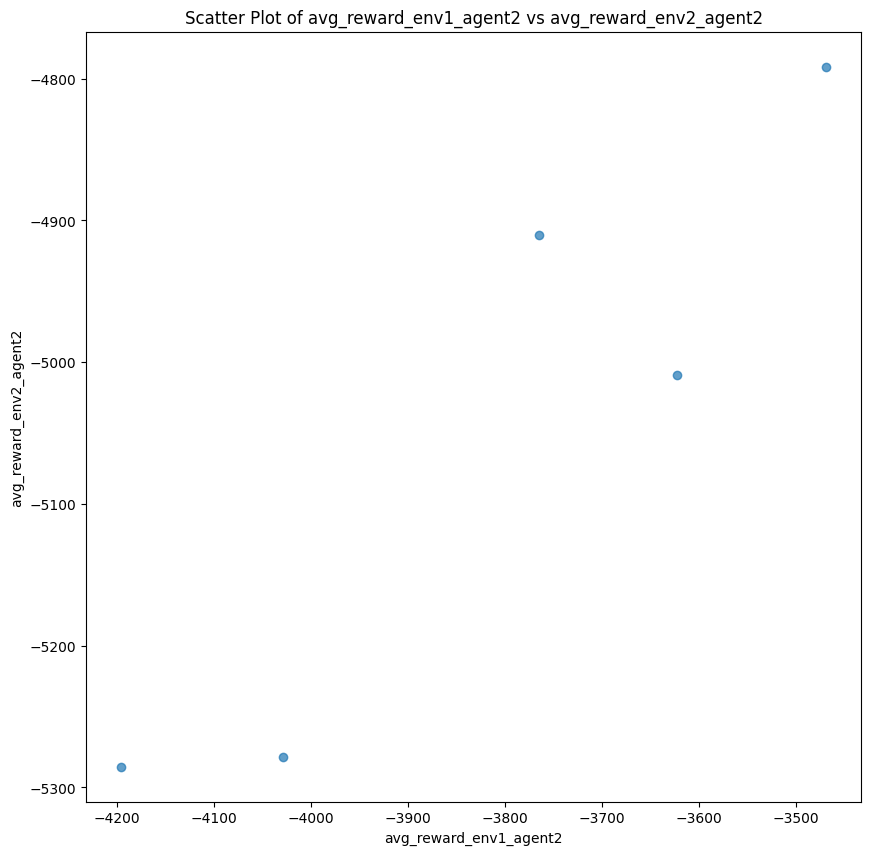

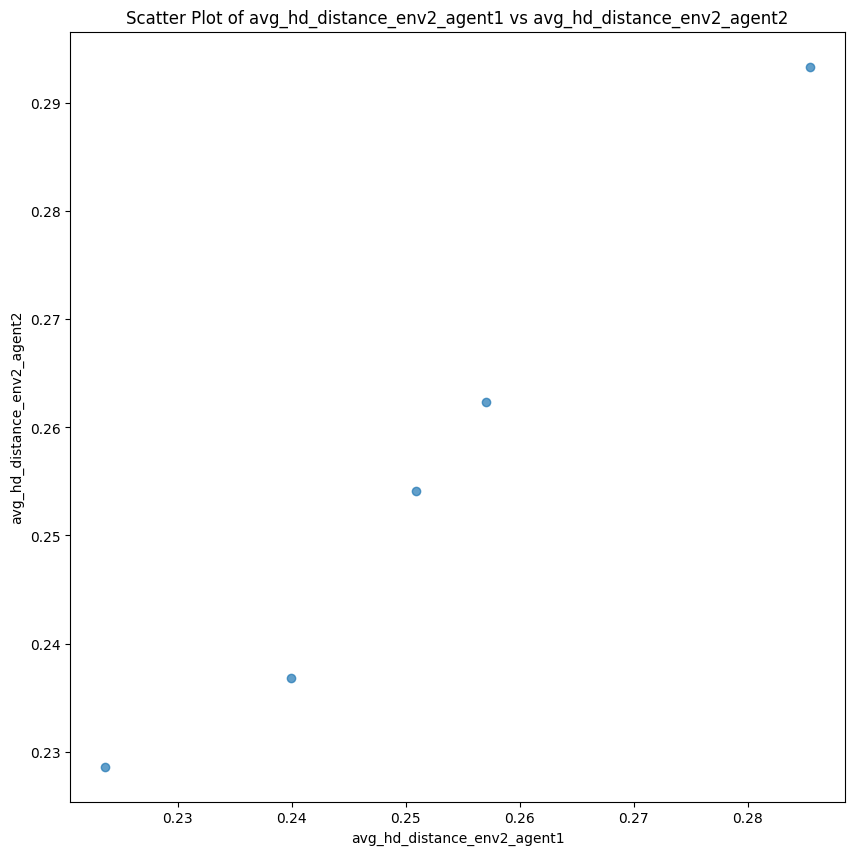

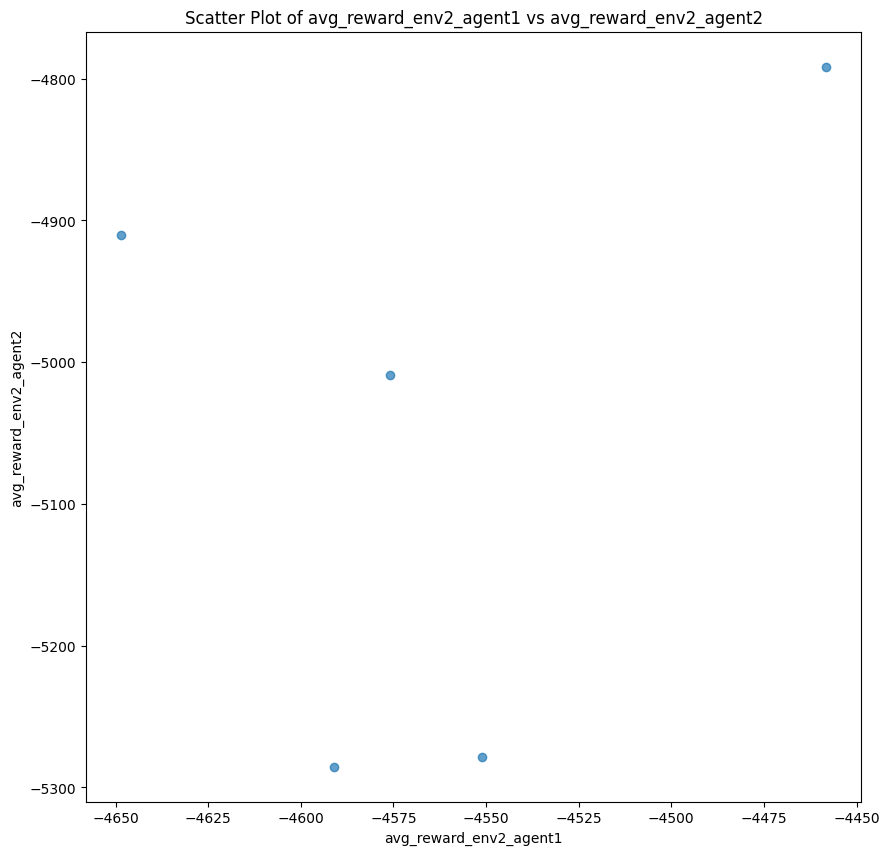

In [16]:


column_pairs = list(itertools.combinations(df.columns, 2))

# Create scatter plots
# naming convention: {metric}_{traffic}_{agent}
for col1, col2 in column_pairs:
    if col1.startswith("avg_hd_distance") and col2.startswith("avg_hd_distance"):
        pass
    elif col1.startswith("avg_reward") and col2.startswith("avg_reward"):
        pass
    else:
        continue
    
    if col1 == "config" or col2 == "config":
        continue
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()